In [91]:
import numpy as np
import matplotlib.pyplot as plt

### scikit-learn's SVM implementation: SVC ###
from sklearn.svm import SVC 

from TolColors import tol_cset, tol_cmap # for better visualizations
cmap = tol_cmap('sunset_discrete')

## Create classes of clustered points
Data needs to be of form: \
`X`: a variable containing the measurable parameters for each point; has shape (n_samples, n_features) \
`y`: a variable containing the class for each data point (think: the auxillary axis of a scatter plot);
    has shape (n_points)

In [127]:
### Generate example dataset ###
# np.random.seed(1)
N1 = 10
N2 = 10

mu1 = np.array([1.0, 1.0])
mu2 = np.array([2.0, 2.0])
# X1 and X2 means for our two distributions

cov1 = np.array([[1, -0.5], 
                 [-0.5, 1]]) 
cov2 = cov1 
# covariance matrices for random sampled gaussians

X1 = np.random.multivariate_normal(mu1, cov1, N1)
X2 = np.random.multivariate_normal(mu2, cov2, N2)
# Generates N two-dimensional random samples centered at [1,1] and [2,2] respectively

X = np.vstack([X1, X2])
# Generates N two-dimensional random samples centered at [1,1] and [2,2] respectively

y = np.hstack([np.zeros(N1), np.ones(N2)])
# y = 0 corresponds to the X1 distribution
# y = 1 corresponds to the X2 distribution

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (20, 2)
y shape: (20,)


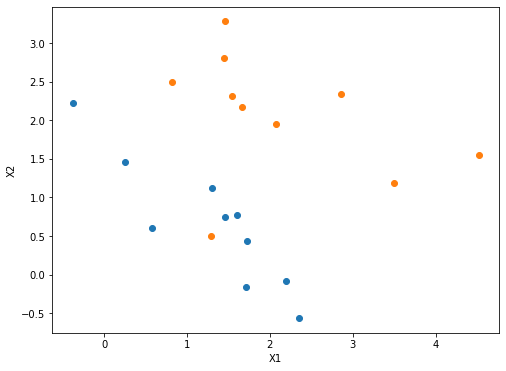

In [128]:
### Plot the input dataset, using data class as the color ### 
fig, ax = plt.subplots(figsize = (8,6))

# ax.scatter(X[:,0], X[:,1], c = y, cmap = cmap) # plots X as axes, with y as color 
# OR 
ax.scatter(X1[:, 0], X1[:,1])
ax.scatter(X2[:, 0], X2[:, 1])

ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

## Fit SVM:
We'll teach `sklearn.svm`'s SVC (C-Support Vector Classification) to classify our data. 

The `SVC` class can be initialized by name, and then fit to the data using its built-in `fit()` function.

In [129]:
model = SVC(kernel = 'linear') # creates a new SVC model 
model.fit(X, y) # fit to generated data

SVC(kernel='linear')

Once fit, we can access a few useful model attributes
+ `svm.support_vectors_`: gives the 'support vectors', the nearest data that were used to define the hyperplane
+ `svm.support_`: gives indices of the suppport vectors
+ `svm.coef_`: gives the weights 
+ `svm.intercept_`

In [130]:
### Try printing off the model's support vectors - what do these correspond to? #### 
print()

# if you have time, try plotting the support vectors over the original X data
# fig, ax = plt.subplots(figsize = (8,6))
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# plt.show()

In [131]:
w = model.coef_[0]
m = - w[0] / w[1]
b = - model.intercept_[0] / w[1]

xx = np.linspace(-2, 4)
yy = m * xx + b

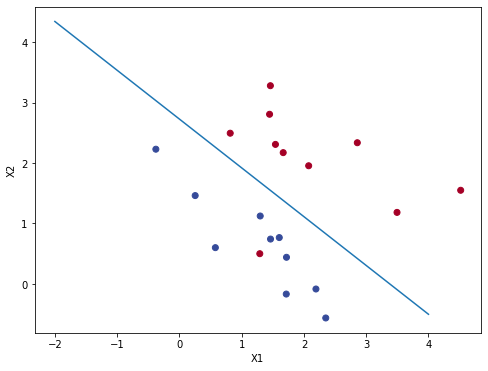

In [132]:
### Plot the hyperplane separating these two classes ###
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(X[:,0], X[:,1], c = y, cmap = cmap)
# ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], c = 'orange')
ax.plot(xx, yy)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

What do you notice about the fit?

## SVM Predictions
Now, we can use `SVC.predict(X)` to predict the labels for an unclassified input dataset

In [133]:
### Generate some gaussian unlabeled input data, centered on [1.5, 1.5]
N = 500
X_ = np.random.multivariate_normal([1.5,1.5], np.eye(2), N)

y_ = model.predict(X_)

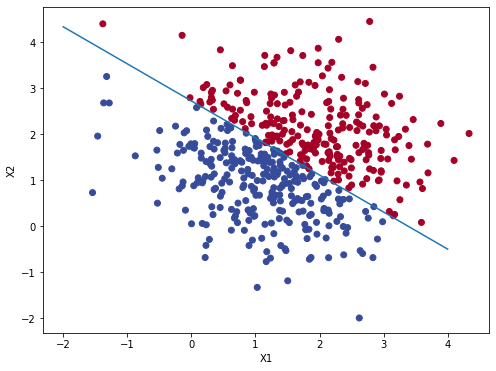

In [134]:
fig, ax = plt.subplots(figsize = (8,6))
# SCATTER PLOT THE INPUT DATA WITH y_ AS THE COLOR  
ax.scatter(X_[:,0], X_[:,1], c = y_, cmap = cmap)
ax.plot(xx, yy)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

# SVMs with nonlinear data
## Create non-linearly-separable datapoints

In [135]:
cov = np.array([[1,0],[0,1]]) # spherical covariance
N_samples = 200

X_A = np.random.multivariate_normal([0,0], cov, N_samples)
# Generates a two-dimensional, homoscedastic gaussian sample

X_B = np.random.multivariate_normal([0,0], cov, N_samples) 
r = 2
mag = np.sqrt(X_B[:, 0]**2 + X_B[:, 1]**2)
cos_sin = np.divide(X_B, np.vstack([mag, mag]).T) # calculates cos and sin of random positions
X_B = X_B + r * cos_sin
# Generates a random disk sample by transforming a two-dimensional gaussian sample to
# the parametrized circle (x + r * cos(theta), y + r * sin(theta))

X = np.vstack([X_A, X_B])
# fit X has shape (N_classes * N_samples, N_classes); here N_classes is 2 (inner or outer)

y = np.hstack([np.zeros(N_samples), np.ones(N_samples)])
# Generate labels for each population

In [137]:
# Try printing the data or using array.shape to understand their dimensions
print()

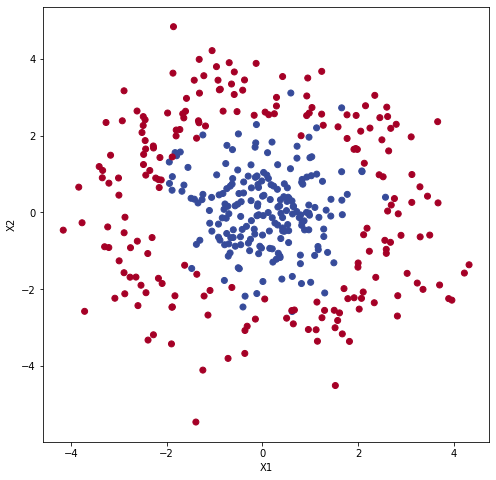

In [138]:
### Plot the datapoints ###
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(X[:,0], X[:,1], c = y, cmap = cmap)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

These datapoints are obviously not linearly seaparable! Let's see what SVM makes of this with different approaches...

## Kernels:
SVM classifiers can use other "kernels" besides linear hyperplanes to fit data of different shapes
+ Linear kernel: $\langle x, x \prime \rangle$ - the most straightforward kernel; use with `kernel = 'linear'`
+ Gaussian (or Radial Basis Function) kernel: $\exp(-\gamma \vert \vert x_i - x_i \prime ||^2)$ for some $\gamma$; use with `kernel = 'rbf'`

In [166]:
model = SVC(kernel = 'rbf') # TRY SWITCHING TO A BETTER KERNEL
model.fit(X, y)

SVC()

It's now a lot harder to parametrize this boundary now that it's nonlinear, so we instead fit our model to a grid in the (X1, X2) plane and then calculate the boundaries

In [167]:
### Calculate the classifier boundaries ###
xx1, xx2 = np.meshgrid(np.linspace(-4,4,1000), 
                    np.linspace(-4,4,1000))

xx = np.vstack([xx1.ravel(), xx2.ravel()]).T
yy = model.predict(xx)
yy = yy.reshape(xx1.shape)

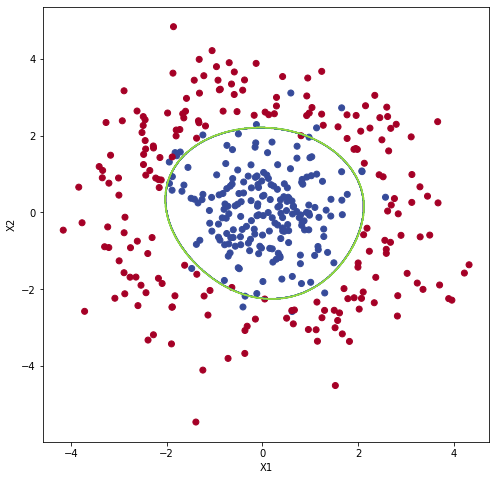

In [168]:
### Plot the datapoints ###
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(X[:,0], X[:,1], c = y, cmap = cmap)
ax.contour(xx1, xx2, yy)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()